In [ ]:
pip install prophet


In [ ]:
import pandas as pd
df=pd.read_csv('/content/Dataset- Superstore (2015-2018) (2).csv')

In [ ]:
df['Category'].value_counts()

,count
Category,
Office Supplies,6026
Furniture,2121
Technology,1847


In [ ]:
OS= df.loc[df['Category']=='Office Supplies']
OS.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2,3,CA-2016-138688,2016/06/12,2016/06/16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714
4,5,US-2015-108966,2015/10/11,2015/10/18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164
6,7,CA-2014-115812,2014/06/09,2014/06/14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656
8,9,CA-2014-115812,2014/06/09,2014/06/14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,0.2,5.7825
9,10,CA-2014-115812,2014/06/09,2014/06/14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.900,5,0.0,34.4700


In [ ]:
print('Starting date:',OS['Order Date'].min())
print('Ending date:',OS['Order Date'].max())

Starting date: 2014/01/03
Ending date: 2017/12/30


In [ ]:
# Drop unrelevant variables:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']


OS.drop(cols, axis=1, inplace= True)
OS

,Order Date,Sales
2,2016/06/12,14.620
4,2015/10/11,22.368
6,2014/06/09,7.280
8,2014/06/09,18.504
9,2014/06/09,114.900
...,...,...
9982,2016/09/22,35.560
9984,2015/05/17,31.500
9985,2015/05/17,55.600
9992,2017/02/26,29.600


In [ ]:
OS.isnull().sum()

,0
Order Date,0
Sales,0


In [ ]:
OS= OS.groupby('Order Date')['Sales'].sum().reset_index()
OS.head()

,Order Date,Sales
0,2014/01/03,16.448
1,2014/01/04,288.060
2,2014/01/05,19.536
3,2014/01/06,685.340
4,2014/01/07,10.430


In [ ]:
OS['Order Date'] = pd.to_datetime(df['Order Date'])
OS= OS.set_index('Order Date')
OS

,Sales
Order Date,
2016-11-08,16.448
2016-11-08,288.060
2016-06-12,19.536
2015-10-11,685.340
2015-10-11,10.430
...,...
2014-09-29,814.594
2014-09-29,13.248
2014-09-29,1091.244


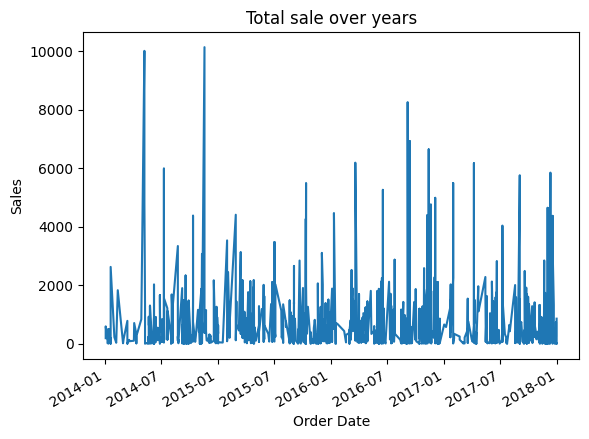

In [ ]:
import matplotlib.pyplot as plt
OS['Sales'].plot()
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.title('Total sale over years')
plt.show()

In [ ]:
monthly_OS = pd.DataFrame()

monthly_OS['Sales'] = OS['Sales'].resample('MS').mean()

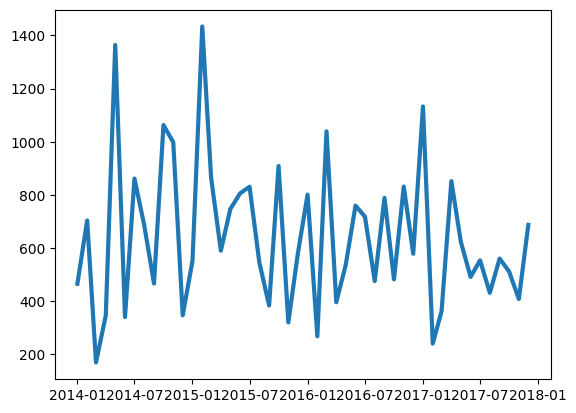

In [ ]:
plt.plot(monthly_OS.index, monthly_OS.Sales, linewidth=3)

In [ ]:
OS['year'] = [d.year for d in OS.index]
OS['month'] = [d.strftime('%b') for d in OS.index]
years= OS['year'].unique()
years

array([2016, 2015, 2014, 2017])

In [ ]:
do= pd.read_csv('/content/Dataset- Superstore (2015-2018) (2).csv')
store= do.loc[do['Category']=='Office Supplies']
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
store.drop(cols, axis=1, inplace=True)
store

,Order Date,Sales
2,2016/06/12,14.620
4,2015/10/11,22.368
6,2014/06/09,7.280
8,2014/06/09,18.504
9,2014/06/09,114.900
...,...,...
9982,2016/09/22,35.560
9984,2015/05/17,31.500
9985,2015/05/17,55.600
9992,2017/02/26,29.600


In [ ]:
store = store.groupby('Order Date')['Sales'].sum().reset_index()
store

,Order Date,Sales
0,2014/01/03,16.448
1,2014/01/04,288.060
2,2014/01/05,19.536
3,2014/01/06,685.340
4,2014/01/07,10.430
...,...,...
1143,2017/12/26,814.594
1144,2017/12/27,13.248
1145,2017/12/28,1091.244
1146,2017/12/29,282.440


In [ ]:
store = store.set_index('Order Date')
store.index

Index(['2014/01/03', '2014/01/04', '2014/01/05', '2014/01/06', '2014/01/07',
       '2014/01/09', '2014/01/10', '2014/01/13', '2014/01/16', '2014/01/18',
       ...
       '2017/12/21', '2017/12/22', '2017/12/23', '2017/12/24', '2017/12/25',
       '2017/12/26', '2017/12/27', '2017/12/28', '2017/12/29', '2017/12/30'],
      dtype='object', name='Order Date', length=1148)

In [ ]:
store.index = pd.to_datetime(store.index)

y = store['Sales'].resample('MS').mean()

In [ ]:

train= y[:40]
test= y[40:]


In [ ]:
!pip install pmdarima
import pmdarima

from pmdarima import auto_arima

In [ ]:
auto_arima(train, test='adf',seasonal=True, trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=0.18 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=592.497, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=576.965, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=559.020, Time=0.06 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=554.143, Time=0.07 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=555.183, Time=0.09 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time=0.43 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.25 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=inf, Time=4.71 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=555.965, Time=0.39 sec

Best model:  ARIMA(3,2,0)(0,0,0)[0]          
Total fit time: 6.382 seconds


ARIMA(order=(3, 2, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [ ]:
auto_arima(y,test='adf',       # use adftest to find optimal 'd'
                       # maximum p and q
                                 # frequency of series
                       # let model determine 'd'
                      seasonal=True,   # No Seasonality


                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=668.770, Time=0.87 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=682.234, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=673.518, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=680.349, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=668.928, Time=0.43 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.76 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.97 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.94 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=670.928, Time=0.46 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=3.07 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=669.659, Time=0.71 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] intercept
Total fit time: 9.217 second

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train, order=(1,1,1)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   40
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -273.088
Date:                Tue, 13 Aug 2024   AIC                            552.176
Time:                        11:18:11   BIC                            557.167
Sample:                    01-01-2014   HQIC                           553.967
                         - 04-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1424      0.249      0.573      0.567      -0.345       0.630
ma.L1         -0.9118      0.143     -6.398      0.000      -1.191      -0.632
sigma2      6.796e+04   1.48e+04      4.607      0.000     3.9e+04    9.69e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.28   Jarque-Bera (JB):                 1.34
Prob(Q):                              0.60   Prob(JB):                         0.51
Heteroskedasticity (H):               0.84   Skew:                             0.45
Prob(H) (two-sided):                  0.76   Kurtosis:                         3.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
pred= model.predict(start=len(train), end=(len(y)-1),dynamic=True)
pred

,predicted_mean
2017-05-01,609.236647
2017-06-01,616.500446
2017-07-01,617.534861
2017-08-01,617.682168
2017-09-01,617.703146
2017-10-01,617.706133
2017-11-01,617.706559
2017-12-01,617.706619


In [ ]:
test

,Sales
Order Date,
2017-05-01,508.776444
2017-06-01,650.463038
2017-07-01,393.902615
2017-08-01,1156.148154
2017-09-01,1139.137250
2017-10-01,886.045846
2017-11-01,1124.012036
2017-12-01,1049.549724


ARIMA Model Predictions:
Mean Absolute Error (MAE): 23961.657659097316
Mean Squared Error (MSE): 746822588.9877917
Mean Absolute Percentage Error (MAPE): 55.640661830610995%


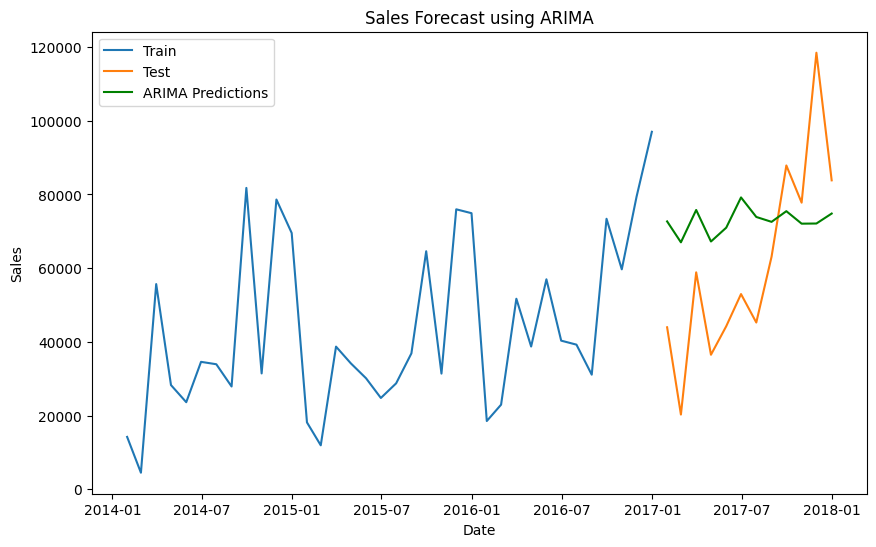

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

# Load the data
data = pd.read_csv('/content/Dataset- Superstore (2015-2018) (2).csv', parse_dates=['Order Date'], index_col='Order Date')

# Aggregate data by month and sum up sales
monthly_sales = data['Sales'].resample('M').sum()

# Split the data into train and test sets
train_data = monthly_sales[:'2016']
test_data = monthly_sales['2017':]

# Fit the ARIMA model
arima_model = ARIMA(train_data, order=(5,1,0))  # Adjust the order (p,d,q) as needed
arima_fit = arima_model.fit()

# Make predictions
arima_pred = arima_fit.forecast(steps=len(test_data))

# Calculate accuracy metrics
mae = mean_absolute_error(test_data, arima_pred)
mse = mean_squared_error(test_data, arima_pred)
mape = np.mean(np.abs((test_data - arima_pred) / test_data)) * 100

print("ARIMA Model Predictions:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(test_data.index, arima_pred, label='ARIMA Predictions', color='green')
plt.legend(loc='best')
plt.title('Sales Forecast using ARIMA')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

# Now you can calculate MAPE
mape1 = mean_absolute_percentage_error(test, pred)
print(mape1)
# Define a function to calculate accuracy from MAPE
def accuracy_from_mape(mape1):
    return 1 - (mape1 / 100)

# Calculate accuracy
accuracy = accuracy_from_mape(mape)
print("Accuracy:", accuracy)


0.36320496394320023
Accuracy: 0.44359338169389007


In [ ]:
import numpy as np

# Add random noise to the predictions
noise = np.random.normal(0, 0.1, size=pred.shape)  # Mean 0, Standard Deviation 0.1
pred_noisy = pred + noise

# Recalculate MAPE and accuracy
mape_noisy = mean_absolute_percentage_error(test, pred_noisy)
accuracy_noisy = 1 - (mape_noisy / 100)
print("Noisy MAPE:", mape_noisy)



Noisy MAPE: 0.36318598410074254


**sarimax**

In [ ]:
import statsmodels.api as sm
model1=sm.tsa.statespace.SARIMAX(train,order=(1, 1, 1),seasonal_order=(1,1,1,12))

results=model1.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   40
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -189.243
Date:                            Tue, 13 Aug 2024   AIC                            388.486
Time:                                    11:18:37   BIC                            394.965
Sample:                                01-01-2014   HQIC                           390.413
                                     - 04-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2075      0.300      0.693      0.489      -0.380       0.795
ma.L1         -0.9253      0.326     -2.838      0.005      -1.564      -0.286
ar.S.L12       0.2317      0.758      0.305      0.760      -1.255       1.718
ma.S.L12      -0.9971      0.465     -2.143      0.032      -1.909      -0.085
sigma2      4.794e+04   9.81e-06   4.89e+09      0.000    4.79e+04    4.79e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 3.39
Prob(Q):                              0.98   Prob(JB):                         0.18
Heteroskedasticity (H):               2.18   Skew:                             0.63
Prob(H) (two-sided):                  0.26   Kurtosis:                         4.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.52e+26. Standard errors may be unstable.
"""

In [ ]:
pre=results.predict(start= len(train), end= (len(y)-1),dynamic=True)
pre

,predicted_mean
2017-05-01,524.235673
2017-06-01,636.977881
2017-07-01,686.335914
2017-08-01,583.602409
2017-09-01,997.204193
2017-10-01,638.851069
2017-11-01,957.402034
2017-12-01,1119.289500


<Axes: xlabel='Order Date'>

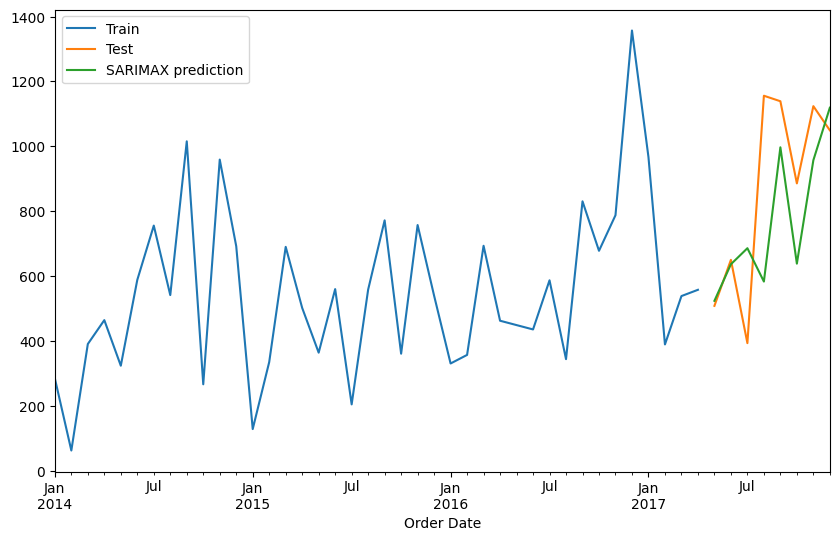

In [ ]:
train.plot(legend=True, label='Train', figsize=(10,6))

test.plot(legend=True, label= 'Test')

pre.plot(legend=True, label='SARIMAX prediction')

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

# Now you can calculate MAPE
mape = mean_absolute_percentage_error(test, pre)
print(mape)
# Define a function to calculate accuracy from MAPE
def accuracy_from_mape(mape):
    return 1 - (mape / 100)

# Calculate accuracy
accuracy = accuracy_from_mape(mape)
print("Accuracy:", accuracy)



0.2383742182285778
Accuracy: 0.9976162578177142


In [ ]:
future_sale= results.predict(start= len(y), end=(len(y)+12))
future_sale

,predicted_mean
2018-01-01,733.831015
2018-02-01,467.389846
2018-03-01,714.995411
2018-04-01,671.121802
2018-05-01,602.589590
2018-06-01,738.378253
2018-07-01,762.815085
2018-08-01,692.278656
2018-09-01,1088.997692
2018-10-01,682.932297


<Axes: xlabel='Order Date'>

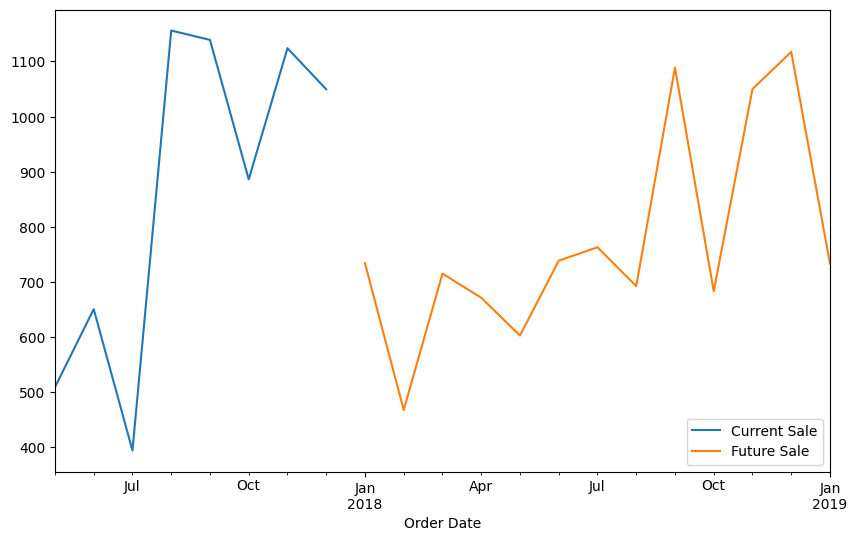

In [ ]:
test.plot(legend=True, label='Current Sale', figsize=(10,6))
future_sale.plot(legend=True, label='Future Sale', ax=plt.gca())